# imports e downloads

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader,Dataset
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch.nn.functional as F

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/BasesSUS/full_base.csv")
df.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16,17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,...,ANO_DT_NOTIFIC,ANO_DT_SIN_PRI,DIA_PRI,DIA_NOT,ONDA,OBES_MORB,FATOR_RISC_GRAVE,COMORBIDADES,COMORBIDADE_GRAVE,TEMP_ULT_DOSE
count,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,732999.000000,30931.000000,...,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,217229.000000
mean,1.582723e+06,5.730485e+01,1.278114e+00,5.343546e+00,6.427031e+00,6.397565e+00,5.668007e+00,6.443313e+00,2.007842,35.323879,...,2.020716e+03,2.020694e+03,4.043286e+02,4.161294e+02,2.728895e+00,8.881200e+00,3.479453e+00,1.400625e+00,4.735294e+00,83955.007554
std,8.754860e+05,1.924869e+01,4.480698e-01,3.833657e+00,3.404388e+00,3.419750e+00,3.739671e+00,3.396157e+00,1.281525,7.777341,...,5.528338e-01,5.534101e-01,1.645432e+02,1.648940e+02,1.277382e+00,9.200586e-01,3.668284e+00,4.900253e-01,3.932084e+00,78411.982446
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,10.000000,...,2.020000e+03,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,8.394822e+05,4.500000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,30.000000,...,2.020000e+03,2.020000e+03,2.790000e+02,2.910000e+02,1.227273e+00,9.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,16416.000000
50%,1.611074e+06,5.800000e+01,1.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,2.000000,34.000000,...,2.021000e+03,2.021000e+03,4.300000e+02,4.420000e+02,3.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,61344.000000
75%,2.332903e+06,7.100000e+01,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,2.000000,39.000000,...,2.021000e+03,2.021000e+03,5.060000e+02,5.190000e+02,4.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,130464.000000
max,3.107771e+06,1.000000e+02,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,80.000000,...,2.022000e+03,2.022000e+03,8.020000e+02,8.090000e+02,5.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,607392.000000


# tratamento

## filtrando colunas

In [4]:
colunas_apagar = ['ANO_DOSE_1_COV', 'ANO_DOSE_2_COV', 'ANO_DT_ENTUTI', 'ANO_DT_INTERNA',  'ANO_DT_NOTIFIC', 'ANO_DT_SIN_PRI', 
                  'DIA_PRI', 'DIA_NOT','DT_SIN_PRI', 'DT_NOTIFIC', 'DT_NASC',
                'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'DT_UT_DOSE',
                 'TOMO_RES', 'RES_AN', 'PCR_RESUL', 'PCR_SARS2', 'COMORBIDADES','DT_EVOLUCA',
                   'CARDIOPATI', 'ASMA','PNEUMOPATI', 'DT_INTERNA', 'OBES_MORB',
                'DIABETES', 'IMUNODEPRE', 'OBESIDADE', 'OBES_IMC','ULT_DOSE',
                'POS_AN_FLU', 'RES_IGG', 'RES_IGM', 'RES_IGA', 'SEM_NOT',#'DT_ENTUTI', 'DT_SAIDUTI',
                'SEM_PRI','Unnamed: 0','HOSPITAL',]
df.drop(columns = colunas_apagar, inplace = True)

In [5]:
df.columns

Index(['NU_IDADE_N', 'FATOR_RISC', 'VACINA_COV', 'VACINA', 'DT_ENTUTI',
       'DT_SAIDUTI', 'UTI', 'EVOLUCAO', 'CLASSI_FIN', 'ONDA',
       'FATOR_RISC_GRAVE', 'COMORBIDADE_GRAVE', 'TEMP_ULT_DOSE',
       'CLASSI_COV_EXAME'],
      dtype='object')

## tempo na UTI

In [6]:
df[(pd.isnull(df["DT_ENTUTI"]) == False) & (pd.isnull(df["DT_SAIDUTI"]) == False)  ][["DT_ENTUTI", "DT_SAIDUTI"]]

,DT_ENTUTI,DT_SAIDUTI
12,2020-02-10,2020-02-13
17,2020-03-28,2020-04-07
21,2020-04-01,2020-04-10
27,2020-03-22,2020-04-12
34,2020-04-09,2020-04-13
...,...,...
1879923,2022-02-16,2022-03-04
1879926,2022-02-22,2022-02-27
1879928,2022-03-03,2022-03-07
1879930,2022-02-25,2022-02-27


In [7]:
df["DT_SAIDUTI"] = pd.to_datetime(df["DT_SAIDUTI"] )
df["DT_ENTUTI"]  = pd.to_datetime(df["DT_ENTUTI"] )

In [8]:
df["TEMP_UTI"] = np.where((pd.isnull(df["DT_ENTUTI"]) == False) & (pd.isnull(df["DT_SAIDUTI"]) == False),  (df["DT_SAIDUTI"] -df["DT_ENTUTI"]).dt.days , 0)
df["TEMP_UTI"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1879939    0.0
1879940    0.0
1879941    0.0
1879942    0.0
1879943    0.0
Name: TEMP_UTI, Length: 1879944, dtype: float64

In [9]:
df["TEMP_UTI"].max()

547.0

In [10]:
df.drop(inplace = True, columns = [ "DT_ENTUTI","DT_SAIDUTI"])

## considerando o tempo da última dose

In [11]:
maximo = df['TEMP_ULT_DOSE'].max()
df['TEMP_ULT_DOSE'] = np.where(pd.isnull(df['TEMP_ULT_DOSE']), maximo*10 , df['TEMP_ULT_DOSE'])
df['TEMP_ULT_DOSE'] .value_counts()

6073920.0    1662715
0.0             4504
864.0           3978
6048.0          3326
1728.0          3234
              ...   
463104.0           1
362016.0           1
358560.0           1
352512.0           1
486432.0           1
Name: TEMP_ULT_DOSE, Length: 427, dtype: int64

## checando que não há NaN

In [12]:
for col in df.columns:
    if pd.isnull(df[col]).any():
        print(col)
        

In [13]:
df.describe()

,NU_IDADE_N,FATOR_RISC,VACINA_COV,VACINA,UTI,EVOLUCAO,CLASSI_FIN,ONDA,FATOR_RISC_GRAVE,COMORBIDADE_GRAVE,TEMP_ULT_DOSE,TEMP_UTI
count,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06,1.879944e+06
mean,5.730485e+01,1.278114e+00,3.744180e+00,6.030286e+00,2.589062e+00,1.341973e+00,4.920063e+00,2.728895e+00,3.479453e+00,4.735294e+00,5.381775e+06,2.398824e+00
std,1.924869e+01,4.480698e-01,3.213671e+00,3.571100e+00,2.532279e+00,4.812894e-01,5.072553e-01,1.277382e+00,3.668284e+00,3.932084e+00,1.915091e+06,7.540767e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+01,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.227273e+00,1.000000e+00,1.000000e+00,6.073920e+06,0.000000e+00
50%,5.800000e+01,1.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,6.073920e+06,0.000000e+00
75%,7.100000e+01,2.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,6.073920e+06,0.000000e+00
max,1.000000e+02,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,9.000000e+00,9.000000e+00,6.073920e+06,5.470000e+02


In [14]:
df.drop(df[df["EVOLUCAO"] == 3].index,inplace = True)

In [15]:
df["EVOLUCAO"].value_counts()

1.0    1243269
2.0     630460
Name: EVOLUCAO, dtype: int64

## incertezas



In [16]:
df["FATOR_RISC"]    = np.where(df["FATOR_RISC"]  == 2,  0, df["FATOR_RISC"] )
df["EVOLUCAO"]      = np.where(  df["EVOLUCAO"]  == 2,  0, df["EVOLUCAO"] )
df["CLASSI_FIN"]   = np.where(df["CLASSI_FIN"] == 5,  1,       0) #1 is covid and 0 is rest

In [17]:
df["UTI"]                = np.where(df["UTI"]               == 2,  0,  df["UTI"]             )
df["VACINA"]             = np.where(df["VACINA"]            == 2,  0,  df["VACINA"]          )
df["VACINA_COV"]         = np.where(df["VACINA_COV"]        == 2,  0,  df["VACINA_COV"]      )
df["FATOR_RISC_GRAVE"]   = np.where(df["FATOR_RISC_GRAVE"]  == 2,  0, df["FATOR_RISC_GRAVE"] )
df["COMORBIDADE_GRAVE"]  = np.where(df["COMORBIDADE_GRAVE"] == 2,  0, df["COMORBIDADE_GRAVE"])

In [18]:
df["UTI"]                = np.where(df["UTI"]               == 9,  0.5,  df["UTI"]             )
df["VACINA"]             = np.where(df["VACINA"]            == 9,  0.5,  df["VACINA"]          )
df["VACINA_COV"]         = np.where(df["VACINA_COV"]        == 9,  0.5,  df["VACINA_COV"]      )
df["FATOR_RISC_GRAVE"]   = np.where(df["FATOR_RISC_GRAVE"]  == 9,  0.5, df["FATOR_RISC_GRAVE"] )
df["COMORBIDADE_GRAVE"]  = np.where(df["COMORBIDADE_GRAVE"] == 9,  0.5, df["COMORBIDADE_GRAVE"])

In [19]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("_"*100)

NU_IDADE_N
[  7   9  29  32   6   1  13  79  61  60   2  11  49  63  43  23  40  47
  57  72  53  92  69  67  81  80  52  33  82  70  48  68  84  37  25  55
  54  77  65  35  31  85  78  76  87  74  58  94  93  66  34  44  45  73
  51  62  59  21  71  36  83  88   3  75  39  64  28  46  41  50  38  90
  86  56  24 100  42  89  91  30  96  27  26  10  20  19   8   5  15  22
  12  18   0   4  16  99  95  14  97  98  17]
____________________________________________________________________________________________________
FATOR_RISC
[1. 0.]
____________________________________________________________________________________________________
VACINA_COV
[0.  0.5 1. ]
____________________________________________________________________________________________________
VACINA
[0.  0.5 1. ]
____________________________________________________________________________________________________
UTI
[0.  0.5 1. ]
___________________________________________________________________________________________

## tipos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873729 entries, 0 to 1879943
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_IDADE_N         int64  
 1   FATOR_RISC         float64
 2   VACINA_COV         float64
 3   VACINA             float64
 4   UTI                float64
 5   EVOLUCAO           float64
 6   CLASSI_FIN         int64  
 7   ONDA               float64
 8   FATOR_RISC_GRAVE   float64
 9   COMORBIDADE_GRAVE  float64
 10  TEMP_ULT_DOSE      float64
 11  CLASSI_COV_EXAME   bool   
 12  TEMP_UTI           float64
dtypes: bool(1), float64(10), int64(2)
memory usage: 187.6 MB


## Normalização

In [21]:
# convert from boolean to float
df['CLASSI_COV_EXAME'].astype('float64')

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1879939    0.0
1879940    0.0
1879941    1.0
1879942    0.0
1879943    0.0
Name: CLASSI_COV_EXAME, Length: 1873729, dtype: float64

In [22]:
mediaULTDOSE = df['TEMP_ULT_DOSE'].mean()
print(mediaULTDOSE)
print(df['TEMP_ULT_DOSE'].std())
print(df['TEMP_ULT_DOSE'].max())

print()

mediaUTI = df['TEMP_UTI'].mean()
print(mediaUTI)
print(df['TEMP_UTI'].std())
print(df['TEMP_UTI'].max())

5383272.163861476
1913315.728152069
6073920.0

2.387395402430127
7.478357731102409
547.0


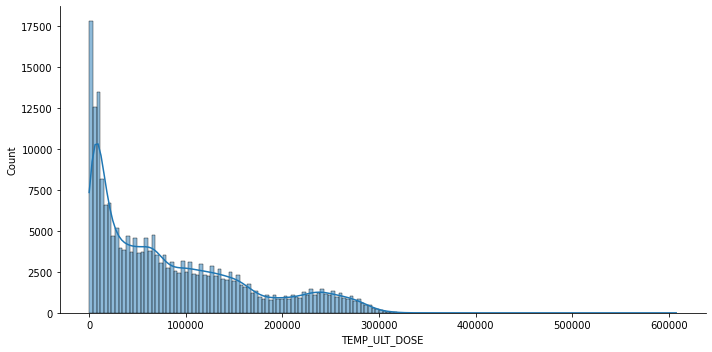

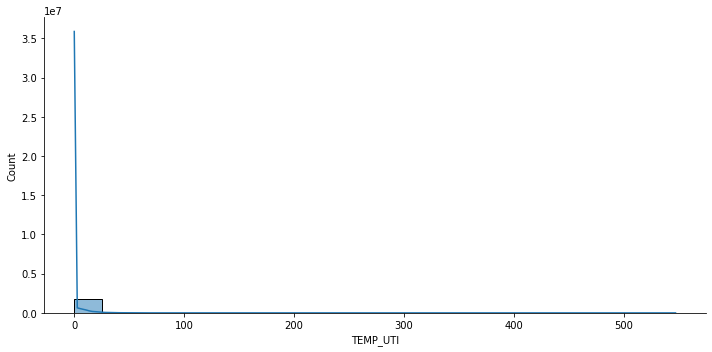

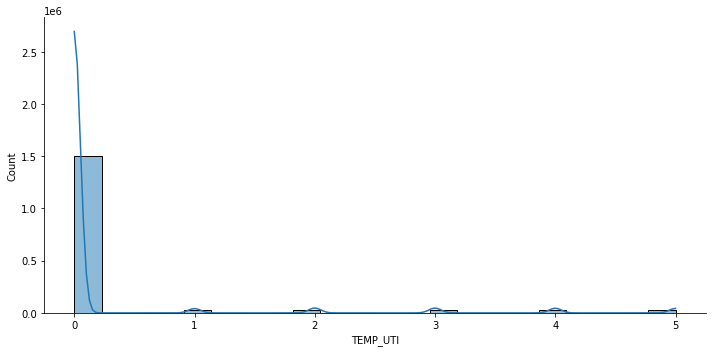

In [23]:
sns.displot(df['TEMP_ULT_DOSE'][df['TEMP_ULT_DOSE'] < 10*maximo], kde = True,aspect = 2)
plt.show()

print()

sns.displot(df['TEMP_UTI'], kde = True,aspect = 2)
plt.show()


sns.displot(df['TEMP_UTI'][df['TEMP_UTI'] <= 5], kde = True,aspect = 2)
plt.show()

In [24]:
df['TEMP_UTI']   = df['TEMP_UTI']/    mediaUTI
df['TEMP_ULT_DOSE'] = df['TEMP_ULT_DOSE']/mediaULTDOSE
df['NU_IDADE_N'] = df['NU_IDADE_N']/100

In [25]:
for col in df.columns:
    print(col)
    print(pd.isnull(df[col]).any())
    print("_"*100)

NU_IDADE_N
False
____________________________________________________________________________________________________
FATOR_RISC
False
____________________________________________________________________________________________________
VACINA_COV
False
____________________________________________________________________________________________________
VACINA
False
____________________________________________________________________________________________________
UTI
False
____________________________________________________________________________________________________
EVOLUCAO
False
____________________________________________________________________________________________________
CLASSI_FIN
False
____________________________________________________________________________________________________
ONDA
False
____________________________________________________________________________________________________
FATOR_RISC_GRAVE
False
____________________________________________________

# Modelo

In [26]:
df["EVOLUCAO"].value_counts()

1.0    1243269
0.0     630460
Name: EVOLUCAO, dtype: int64

In [27]:
class Model(nn.Module):
    def __init__(self, input_dimension = 12,output_dimension = 2):
        super(Model, self).__init__()
        self.L1 = nn.Linear(input_dimension,50)
        self.L2 = nn.Linear(50,20)
        self.L3 = nn.Linear(20,10)
        self.L4 = nn.Linear(10,output_dimension)
        
        

    def forward(self,x):
        x = F.relu( self.L1 (x) )
        x = F.relu( self.L2 (x) )
        x = F.relu( self.L3 (x) )
        return F.softmax( self.L4 (x) )

    def normalize(self,X,normUTI = 10,normULTDOSE = 5383272):
        X['TEMP_UTI']   = X['TEMP_UTI']/    normUTI
        X['TEMP_ULT_DOSE'] = X['TEMP_ULT_DOSE']/normULTDOSE
        X['NU_IDADE_N'] = X['NU_IDADE_N']/100 

# Treinamento

## separar features e label

###Separa aproximadamente mesma quantidade para evitar esquecimento catastrófico

In [28]:
df[df["CLASSI_FIN"] == 1]

,NU_IDADE_N,FATOR_RISC,VACINA_COV,VACINA,UTI,EVOLUCAO,CLASSI_FIN,ONDA,FATOR_RISC_GRAVE,COMORBIDADE_GRAVE,TEMP_ULT_DOSE,CLASSI_COV_EXAME,TEMP_UTI
7,0.79,1.0,0.0,0.5,0.0,0.0,1,1.0,1.0,1.0,1.128295,True,0.000000
8,0.61,1.0,0.0,0.5,0.0,1.0,1,1.0,1.0,0.5,1.128295,True,0.000000
10,0.60,1.0,0.0,0.5,1.0,0.0,1,1.0,1.0,1.0,1.128295,True,0.000000
15,0.32,0.0,0.0,0.5,0.5,1.0,1,1.0,0.5,0.5,1.128295,True,0.000000
17,0.43,0.0,0.0,0.5,1.0,1.0,1,1.0,0.5,0.5,1.128295,True,4.188665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879939,0.72,1.0,1.0,0.5,1.0,0.0,1,5.0,1.0,1.0,0.037717,False,0.000000
1879940,0.75,1.0,1.0,0.0,0.0,1.0,1,5.0,1.0,1.0,0.013000,False,0.000000
1879941,0.63,1.0,1.0,0.5,0.0,1.0,1,5.0,1.0,1.0,0.005457,True,0.000000
1879942,0.41,0.0,1.0,0.5,0.0,1.0,1,5.0,0.5,0.5,0.019260,False,0.000000


In [29]:
N0covid = len(df[df["CLASSI_FIN"] == 0])
df_equilibrado = (df[df["CLASSI_FIN"] == 1].sample(2*N0covid)).append(df[df["CLASSI_FIN"] == 0])

In [30]:
features,labels = df_equilibrado.drop(columns = ["CLASSI_FIN","EVOLUCAO","TEMP_UTI"]), df_equilibrado["CLASSI_FIN"]
features_train,features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42, shuffle=True)

In [31]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104856 entries, 1242370 to 1380769
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NU_IDADE_N         104856 non-null  float64
 1   FATOR_RISC         104856 non-null  float64
 2   VACINA_COV         104856 non-null  float64
 3   VACINA             104856 non-null  float64
 4   UTI                104856 non-null  float64
 5   ONDA               104856 non-null  float64
 6   FATOR_RISC_GRAVE   104856 non-null  float64
 7   COMORBIDADE_GRAVE  104856 non-null  float64
 8   TEMP_ULT_DOSE      104856 non-null  float64
 9   CLASSI_COV_EXAME   104856 non-null  bool   
dtypes: bool(1), float64(9)
memory usage: 8.1 MB


## otimização

In [32]:
model = Model(features_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()#nn.NLLLoss()#
epochs = 200#55#600


feature_float = torch.from_numpy(features_train.values.astype("float64"))
input_dimension =  feature_float.shape[1]
output_dimension = 2

x_train, y_train = Variable(feature_float).float(), Variable(torch.tensor(labels_train.values)).long()
print("y_train: ",y_train)


for epoch in range(1, epochs+1):
    
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    
    print ("Epoch ",epoch,"|  loss: ", loss.item(),)#"  |  accuracy: ", accuracy_score(labels_train, np.argmax(y_pred.detach().numpy(), axis=1)))
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients
    optimizer.step() # Update

y_train:  tensor([1, 1, 1,  ..., 0, 0, 0])
Epoch  1 |  loss:  0.7227473855018616
Epoch  2 |  loss:  0.7136915922164917


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Epoch  3 |  loss:  0.7084002494812012
Epoch  4 |  loss:  0.7049852013587952
Epoch  5 |  loss:  0.7006953954696655
Epoch  6 |  loss:  0.6956295967102051
Epoch  7 |  loss:  0.689993143081665
Epoch  8 |  loss:  0.6835351586341858
Epoch  9 |  loss:  0.6762439608573914
Epoch  10 |  loss:  0.6682252287864685
Epoch  11 |  loss:  0.6594606041908264
Epoch  12 |  loss:  0.649978756904602
Epoch  13 |  loss:  0.6399266719818115
Epoch  14 |  loss:  0.6293627619743347
Epoch  15 |  loss:  0.618457555770874
Epoch  16 |  loss:  0.6074599623680115
Epoch  17 |  loss:  0.5965360999107361
Epoch  18 |  loss:  0.5857111811637878
Epoch  19 |  loss:  0.5745174288749695
Epoch  20 |  loss:  0.5624130368232727
Epoch  21 |  loss:  0.5491973161697388
Epoch  22 |  loss:  0.5353370904922485
Epoch  23 |  loss:  0.5224562883377075
Epoch  24 |  loss:  0.5119944214820862
Epoch  25 |  loss:  0.5019621849060059
Epoch  26 |  loss:  0.4919005036354065
Epoch  27 |  loss:  0.4833349585533142
Epoch  28 |  loss:  0.4766420722007

## avaliação do modelo

In [33]:
print("Train set")

pred = model(x_train)
print ("The loss in train set is: ", loss_fn(pred,y_train).item())
print ("The accuracy in train set is: ", accuracy_score(labels_train, np.argmax(pred.detach().numpy(), axis=1)))

print("\nconfusion matrix: ")
print(confusion_matrix(labels_train , np.argmax(pred.detach().numpy(),axis=1)))

print("\n","_"*100,"\n")

print("Validation set")

y_test = Variable(torch.tensor(labels_test.values)).long()
x_test = Variable(torch.from_numpy(features_test.values.astype("float64"))).float()

pred = model(x_test)

print ("The loss in test set is: ", loss_fn(pred,y_test).item())
print ("The accuracy in test set is:  ", accuracy_score(labels_test, np.argmax(pred.detach().numpy(),axis=1)))

print("\nconfusion matrix: ")
print(confusion_matrix(labels_test , np.argmax(pred.detach().numpy(),axis=1)))

print("\n\n\n")


Train set
The loss in train set is:  0.39738795161247253
The accuracy in train set is:  0.9111448081177996

confusion matrix: 
[[29489  5420]
 [ 3897 66050]]

 ____________________________________________________________________________________________________ 

Validation set
The loss in test set is:  0.39584964513778687
The accuracy in test set is:   0.9123394272308528

confusion matrix: 
[[ 9880  1814]
 [ 1250 22009]]






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


# set não visto

Este poderia ser considerado o test set e o usado acima sendo o validation set.

In [34]:
df_deseq = df.drop(index = df_equilibrado.index)

In [38]:
features,labels = df_deseq.drop(columns = ["CLASSI_FIN","EVOLUCAO","TEMP_UTI"]), df_deseq["CLASSI_FIN"]

X, Y = Variable(torch.from_numpy(features.values.astype("float64"))).float(), Variable(torch.tensor(labels.values)).long()



In [ ]:
pred = model(X)
loss = loss_fn(pred, Y)
print()
print ("The loss in not used set is:      ", loss_fn(pred,Y).item())
print ("The accuracy in not used set is:  ", accuracy_score(labels, np.argmax(pred.detach().numpy(),axis=1)))

print(confusion_matrix(Y , np.argmax(pred.detach().numpy(),axis=1)))